# Devinons l'humeur d'une musique

L'objectif de ce projet est de pouvoir automatiquement déterminer si une musique est triste ou bien joyeuse. Pour cela nous allons utiliser la librairie [librosa](https://librosa.org/doc/latest/index.html). Cette dernière nous permettra de visualiser et d'obtenir des informations sur les musiques.
Nous avons téléchargé 10 musiques "tristes" et 10 musiques "joyeuses". Elles sont placées dans le dossier ./data/musics/ et commence par a pour les musiques joyeuses et b pour les musiques tristes.

In [183]:
%load_ext autoreload
%autoreload 2
data_dir = "./data/"
from utilities import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
a = 5

In [97]:
import librosa # for working with audio in python
import librosa.display # for waveplots, spectograms, etc
import soundfile as sf # for accessing file information
import IPython.display as ipd # for playing files within python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

## Chargement des données et prise en main de librosa
Notre première étape va être de charger les données et d'extraire des informations avec la librairie audio librosa.

In [5]:
musics = ls("./data/musics")
for music in musics:
    info = sf.info("./data/musics/" + music)
    print(info)

./data/musics/a01.wav
samplerate: 44100 Hz
channels: 2
duration: 03:51.410 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a02.wav
samplerate: 44100 Hz
channels: 2
duration: 03:22.524 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a03.wav
samplerate: 44100 Hz
channels: 2
duration: 04:8.848 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a04.wav
samplerate: 44100 Hz
channels: 2
duration: 04:26.774 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a05.wav
samplerate: 44100 Hz
channels: 2
duration: 03:17.741 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a06.wav
samplerate: 44100 Hz
channels: 2
duration: 02:46.348 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit PCM [PCM_16]
./data/musics/a07.wav
samplerate: 44100 Hz
channels: 2
duration: 03:48.252 min
format: WAV (Microsoft) [WAV]
subtype: Signed 16 bit

In [6]:
musics = ls("./data/musics")
y,sr = librosa.load("./data/musics/" + musics[10], offset=15, duration=3)
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
#df = pd.DataFrame(y, columns=['Amplitude'])
#df.index = [(1/sr)*i for i in range(len(df.index))]
tempo # regardons à quoi ça ressemble

112.34714673913044

In [7]:
musics = load_musics(data_dir + "musics/")
print("done")

done


# Affichons nos données
Nous allons maintenant visualiser nos données. Peut-être que ça nous donnera des idées de features.

# Testons nos features
Nous allons maintenant tester les features que nous avons implémentés et regarder si elles nous donnent des résultats cohérents.

In [210]:
df = pd.DataFrame({
	'amplitude' : musics.apply(mean_amplitude),
	'amplitude_std' : musics.apply(amplitude_std), 
    'spectral_centroid' : musics.apply(spectral_centroid_median),
	'spectral_centroid_std' : musics.apply(spectral_centroid_std),
	'chroma_stft' : musics.apply(chroma_stft),
	'tempo' : musics.apply(get_tempo),
	'classe': musics.index.map(lambda name: 1 if name[0] == 'a' else -1),
})

In [211]:
dfstd = df
dfstd = (df - df.mean()) / df.std()
dfstd["classe"] = df["classe"]
dfstd.style.background_gradient(cmap='RdYlBu_r')

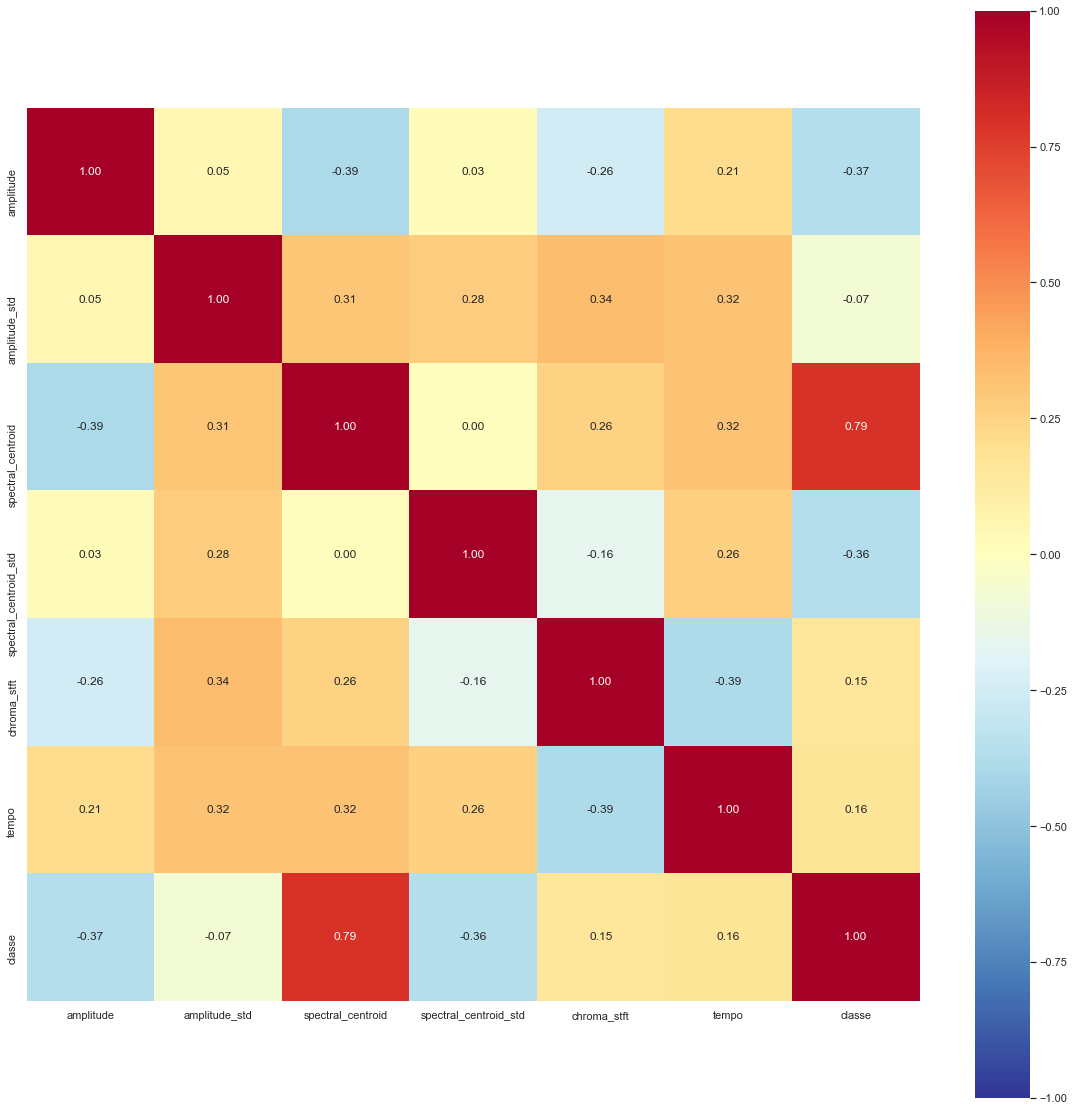

In [212]:
fig = Figure(figsize=(20,20))
sns.heatmap(dfstd.corr(), fmt='0.2f', annot=True, square=True, cmap='RdYlBu_r', vmin=-1, vmax=1, ax=fig.add_subplot())
fig

In [175]:
perm = list(itertools.combinations_with_replacement(range(4), 2))
for idx, (a, b) in enumerate(perm):
    print(idx, a, b)

0 0 0
1 0 1
2 0 2
3 0 3
4 1 1
5 1 2
6 1 3
7 2 2
8 2 3
9 3 3


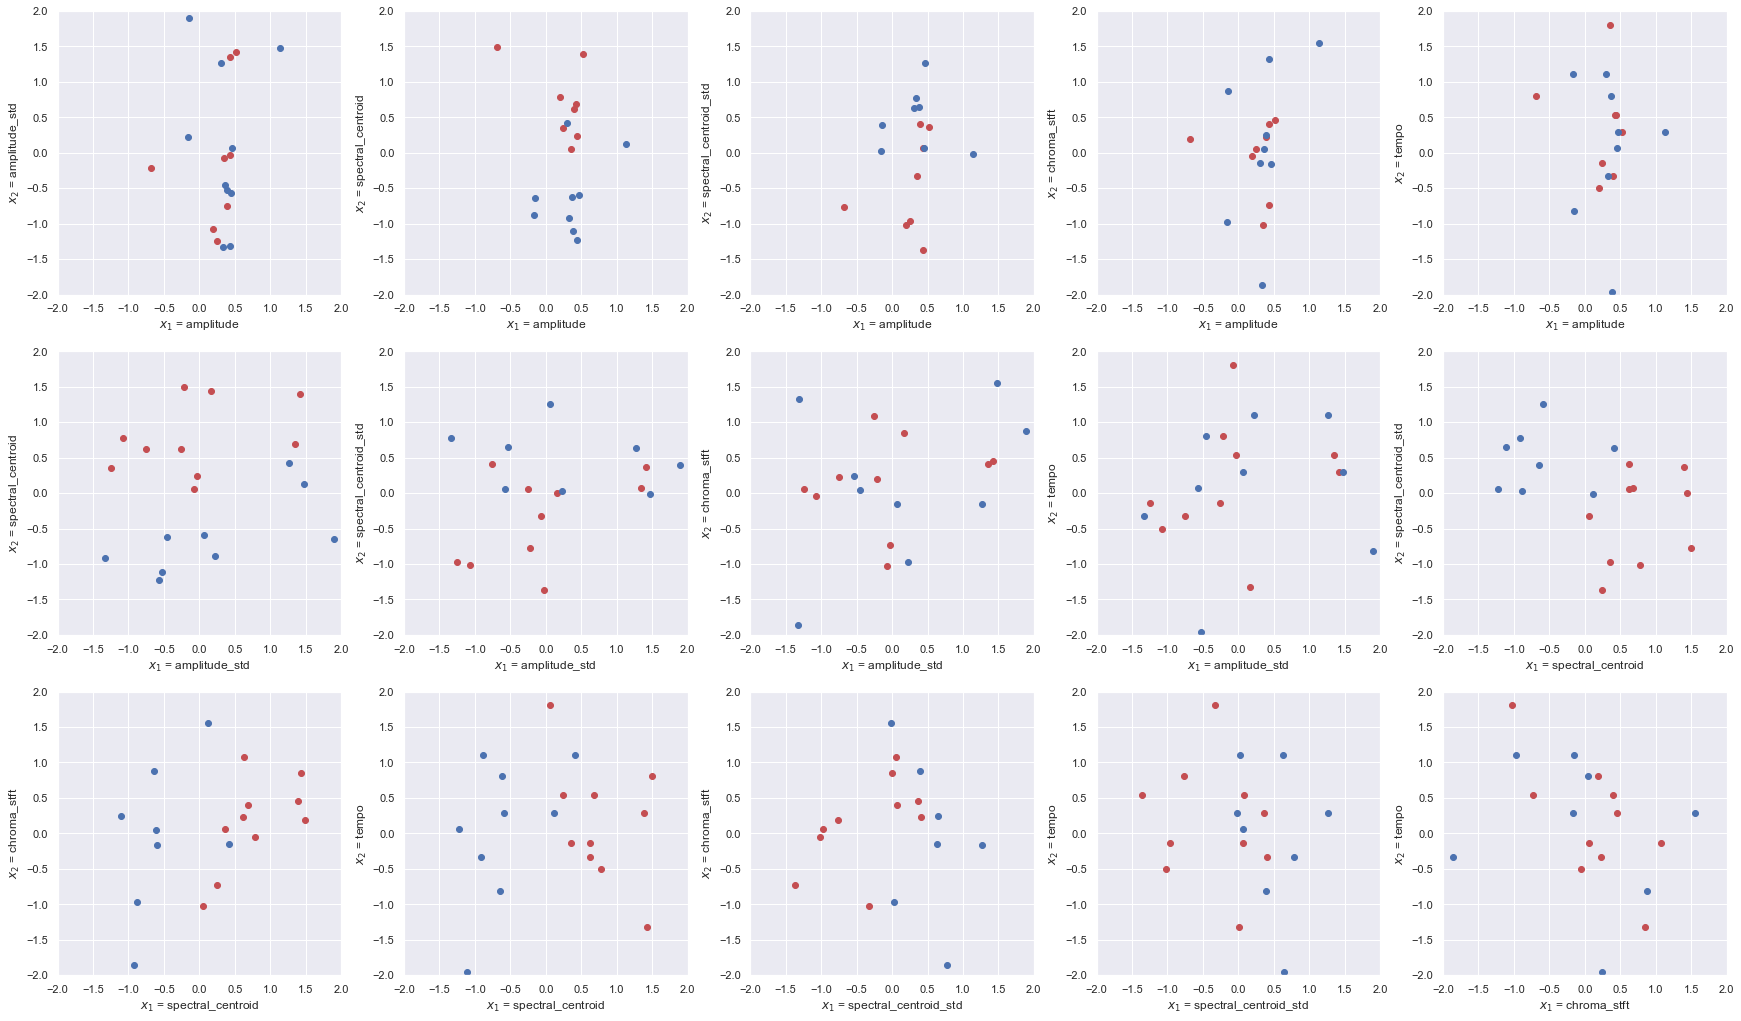

In [213]:
make_scatter_plot3(dfstd)

# Hello

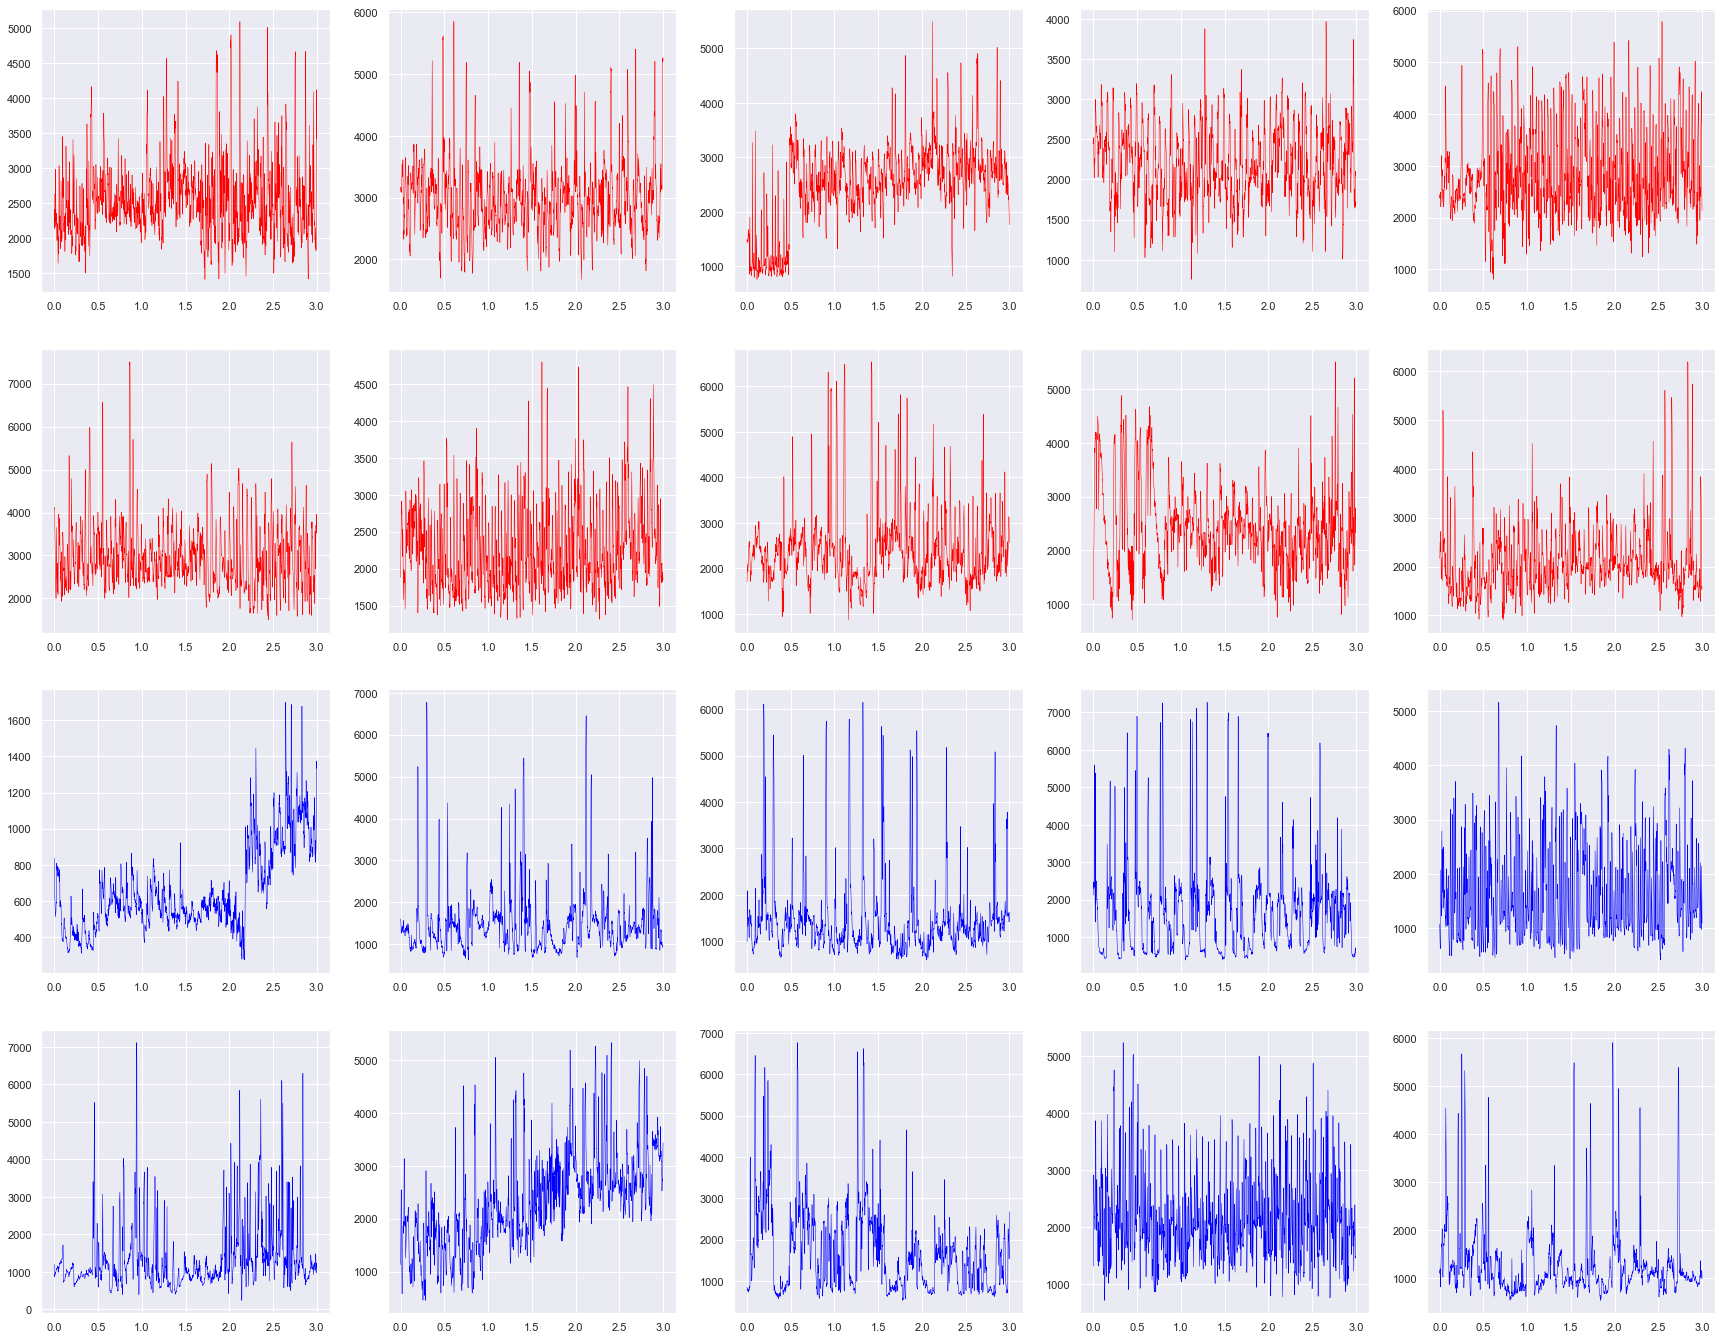

In [12]:
plt_compare2(musics, spect_cent)

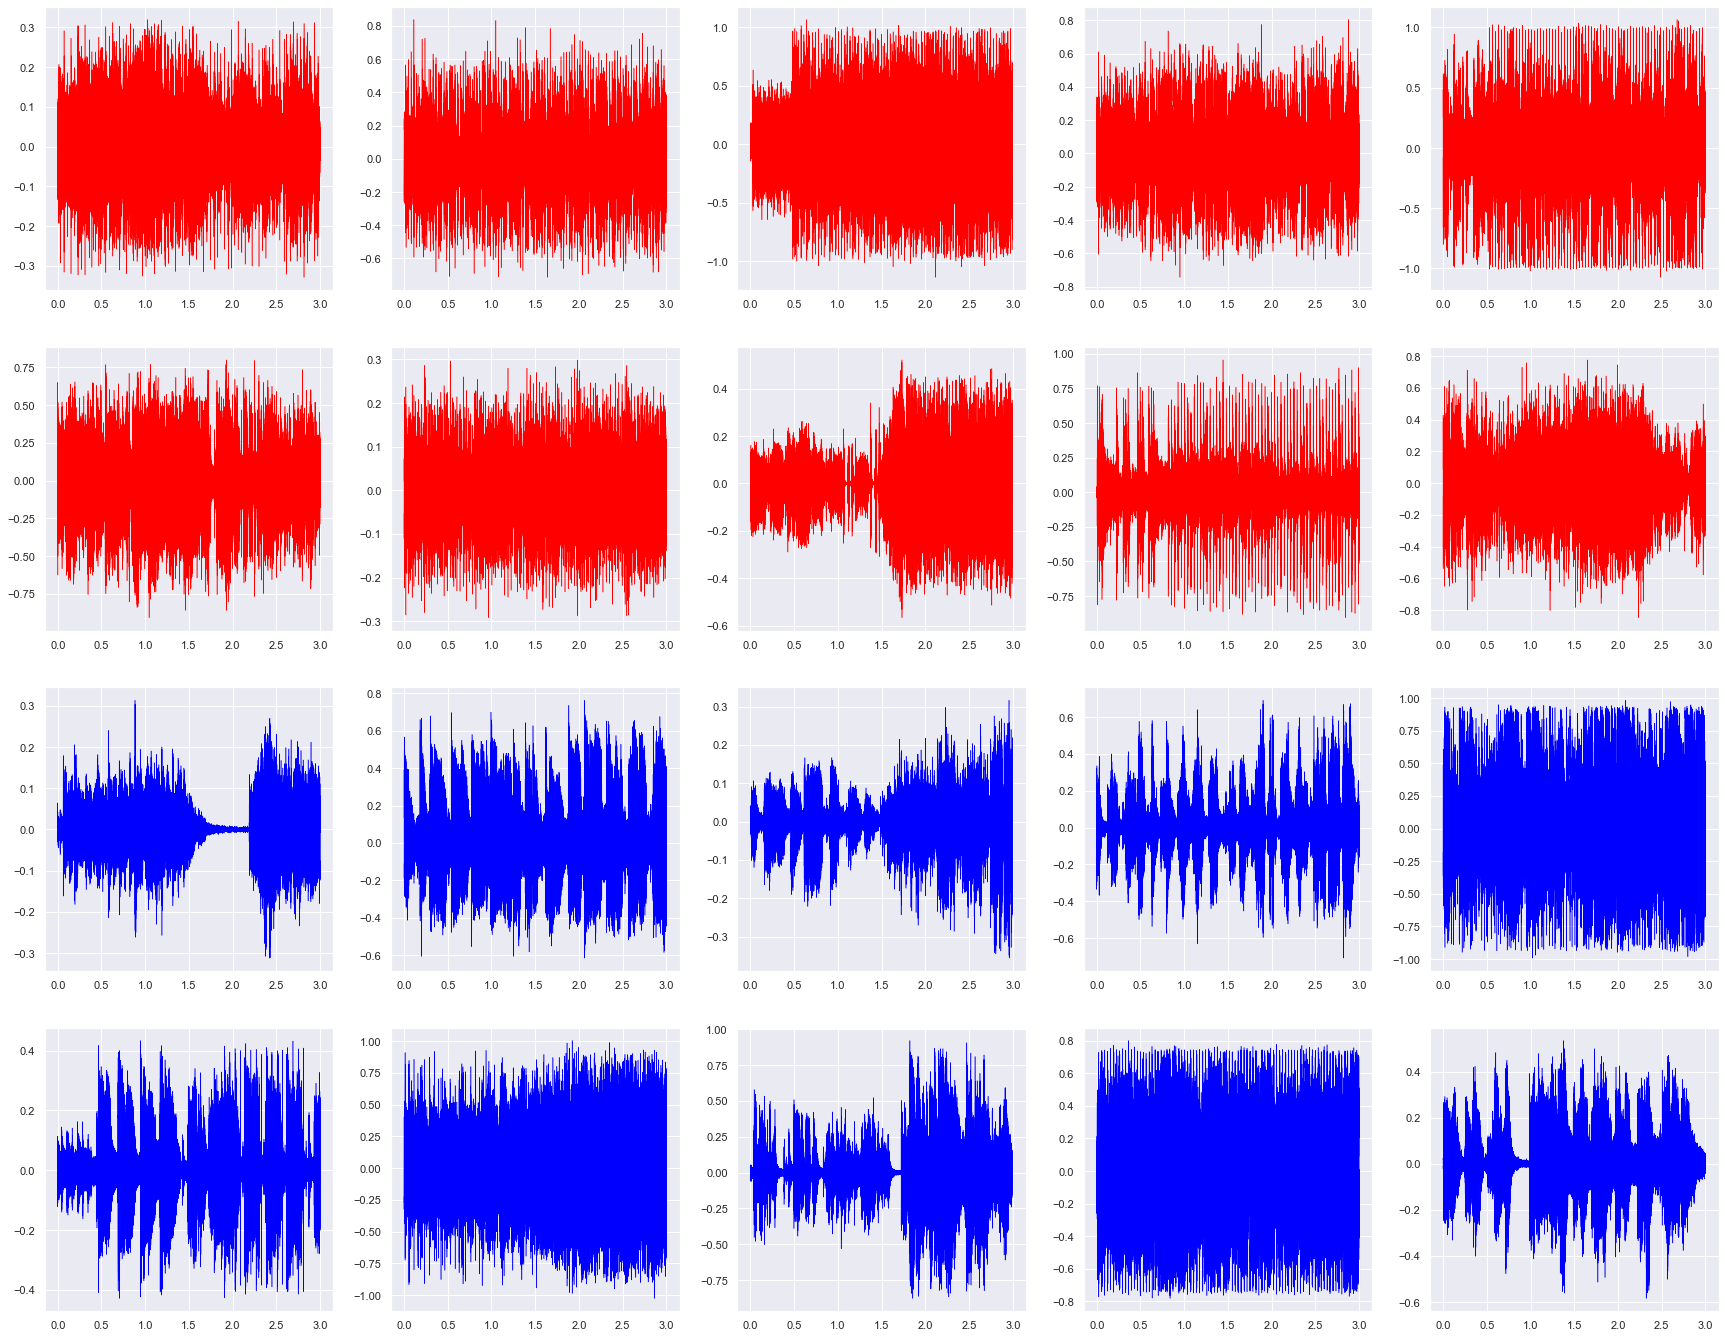

In [13]:
plt_compare2(musics, lambda music : music[0])

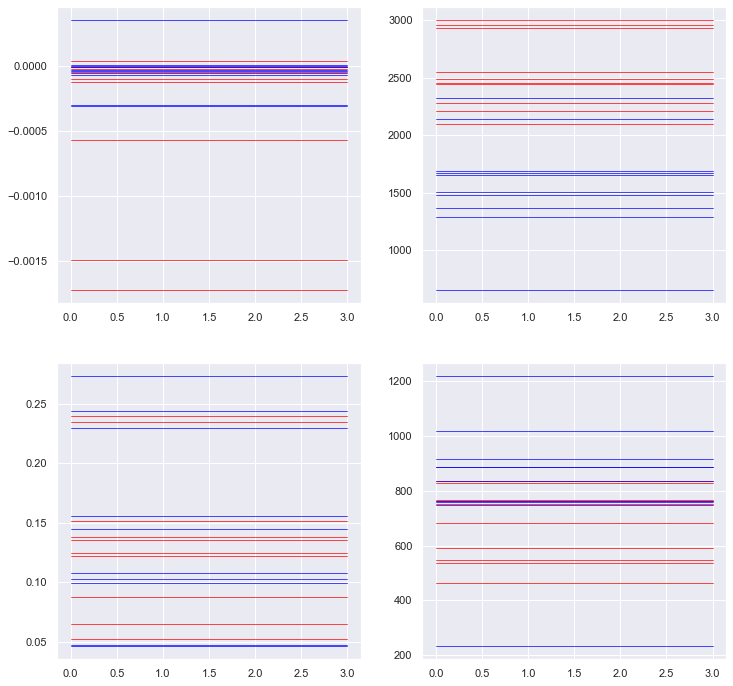

In [25]:
fig = plt.figure(figsize=(12, 12))
ax_P = fig.add_subplot(2, 2, 1)
plt_compare(musics, mean_amplitude, ax_P)
ax_Q = fig.add_subplot(2, 2, 2)
plt_compare(musics, spectral_centroid_median, ax_Q)
ax_R = fig.add_subplot(2, 2, 3)
plt_compare(musics, amplitude_std, ax_R)
ax_S = fig.add_subplot(2, 2, 4)
plt_compare(musics, spectral_centroid_std, ax_S)

In [201]:
m = load_music_from_ytb("https://www.youtube.com/watch?v=EGOBLZNBiVM")
y, sr = m

In [192]:
c = chroma_stft(m)
c

0.29093128

In [203]:
chroma_cq = librosa.feature.chroma_cqt(y=y, sr=sr)
chroma_cq

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.47585127, 0.56605005, 0.65735257, ..., 0.50298524, 0.5055102 ,
        0.5057479 ],
       [0.34023136, 0.36260703, 0.41020018, ..., 0.6197366 , 0.6405386 ,
        0.63043606],
       ...,
       [0.12628902, 0.16856068, 0.18327878, ..., 0.3191222 , 0.34125713,
        0.35027164],
       [0.17192239, 0.19482383, 0.18567775, ..., 0.2118754 , 0.18787779,
        0.17828251],
       [0.29412887, 0.33825216, 0.34220946, ..., 0.50333095, 0.50039965,
        0.4794341 ]], dtype=float32)

In [204]:
np.median(chroma_cq)

0.24960718